<a href="https://colab.research.google.com/github/FabrizioBettetti/Machine-learning/blob/main/Multiclass_classification_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
#num_words=10000: first 10k most frequent words (indexes from 0 to 9999)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()   #Dictionary <word, index>
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])   #Reversed dictionary: <index, word>

#In the newswire, indexes are offset by 3 wrt reversed dictionary to have indexes 0, 1, 2 reserved for padding,
#start of sequence, unknown respectively
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
decoded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [6]:
train_labels[10]   #Topic index: {0, 1, ..., 45}

np.int64(3)

In [7]:
import numpy as np

#Multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

#One-hot encoding for categorical labels
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [10]:
#Built-in one-hot encoding for categorical labels

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [11]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
len(y_train[10])

46

In [13]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),   #32, 64, 128
    layers.Dense(64, activation='relu'),   #32, 64, 128
    layers.Dense(46, activation='softmax')
])

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.3764 - loss: 3.1682 - val_accuracy: 0.5620 - val_loss: 1.8565
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6150 - loss: 1.6502 - val_accuracy: 0.6880 - val_loss: 1.4282
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7265 - loss: 1.2609 - val_accuracy: 0.7230 - val_loss: 1.2318
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7833 - loss: 1.0178 - val_accuracy: 0.7540 - val_loss: 1.1185
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8235 - loss: 0.8302 - val_accuracy: 0.7770 - val_loss: 1.0181
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8546 - loss: 0.6996 - val_accuracy: 0.7950 - val_loss: 0.9645
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8894 - loss: 0.5541 - val_accuracy: 0.8020 - val_loss: 0.9454
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9001 - loss: 0.4811 - val_accuracy: 0.8060 - 

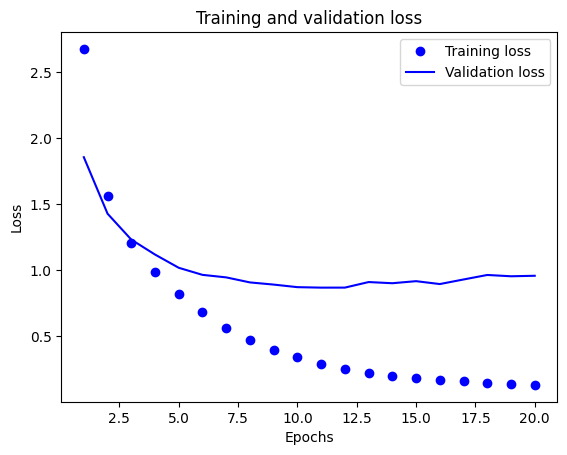

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
np.argmin(val_loss) + 1

np.int64(11)

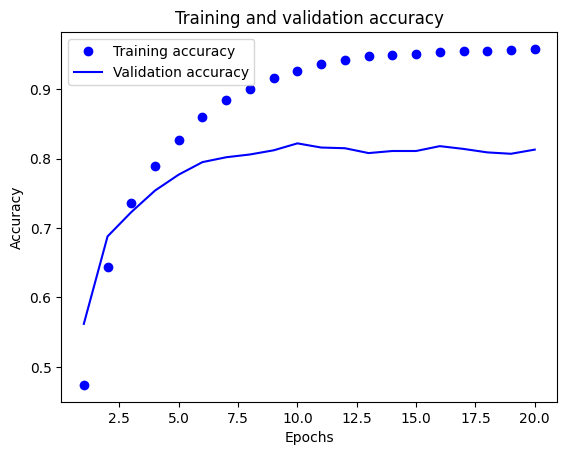

In [19]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
np.argmax(val_acc) + 1

np.int64(10)

##Model with optimal epochs

In [29]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3792 - loss: 3.1967
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6517 - loss: 1.6547
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7241 - loss: 1.2622
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7833 - loss: 0.9902
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8268 - loss: 0.8210
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8551 - loss: 0.6865
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8821 - loss: 0.5672
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9023 - loss: 0.4753
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9238 - loss: 0.3817
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9296 - loss: 0.3325
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7977 - loss: 0.9066


[0.9424470663070679, 0.7898486256599426]

In [30]:
#Random classifier

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.18432769367764915)

In [31]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

np.float32(1.0)

In [34]:
np.argmax(predictions[0])   #Class (topic) with highest probability

np.int64(3)

In [35]:
#Integer encoding of categorical labels (an integer for each class)
#y_train = np.array(train_labels)
#y_test = np.array(test_labels)

#labels with one-hot encoding => loss = categorical crossentropy
#labels with integer encodin => loss = sparse categorical crossentropy

##Model with information bottleneck layer (layer with units << 46)

In [36]:
model = keras.Sequential([
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

model.evaluate(x_test, y_test)   #Accuracy drop!

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.0440 - loss: 3.5567 - val_accuracy: 0.3980 - val_loss: 2.8992
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3882 - loss: 2.6527 - val_accuracy: 0.3970 - val_loss: 2.1997
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3903 - loss: 2.0754 - val_accuracy: 0.3940 - val_loss: 1.9446
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3950 - loss: 1.8361 - val_accuracy: 0.3970 - val_loss: 1.8426
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4143 - loss: 1.6871 - val_accuracy: 0.4320 - val_loss: 1.7825
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4605 - loss: 1.6148 - val_accuracy: 0.4490 - val_loss: 1.7806
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4782 - loss: 1.5570 - val_accuracy: 0.4730 - val_loss: 1.7242
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4970 - loss: 1.4695 - val_accuracy: 0.4810 - val_loss

[1.860642910003662, 0.6696348786354065]

Try:
*   layers with 32 and 128 units
*   1 and 3 hidden layers instead of 2